## Знакомство с библиотекой Pandas

Для начала работы необходимо подключить модули `numpy` и `pandas`. Если планируется использовать графику, то подключаем ещё и `matplotlib`:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Series

Принципиальное отличие «рядов» в Pandas от массивов в NumPy — возможность использования нечисловых индексов. Таким образом, они во многом похожи на словари (dict) языка Python.

In [2]:
fruits = ["Яблоки сезонные", "Груши «Конференция»", "Бананы", "Мандарины (Турция)", "Апельсины"]
prices = [99, 145, 75, 90, 125]
fruits_series = pd.Series(prices)
fruits_series 

0     99
1    145
2     75
3     90
4    125
dtype: int64

In [3]:
fruits_series = pd.Series(prices, index = fruits)
fruits_series 

Яблоки сезонные         99
Груши «Конференция»    145
Бананы                  75
Мандарины (Турция)      90
Апельсины              125
dtype: int64

<AxesSubplot:>

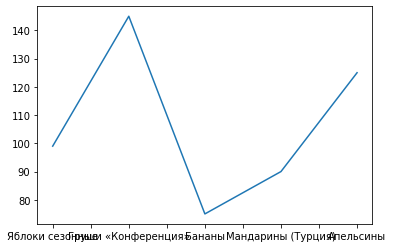

In [4]:
fruits_series.plot()

С помощью дополнительных параметров можно лекго исправить наблюдаемые дефекты:

<AxesSubplot:>

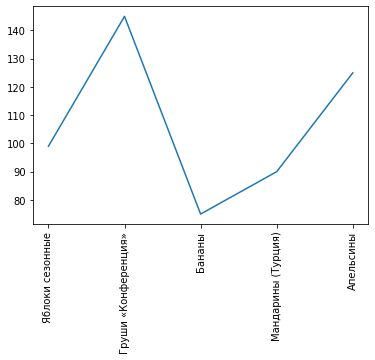

In [5]:
fruits_series.plot(xticks=range(len(fruits_series.index)), use_index=True, rot = 90)

<AxesSubplot:>

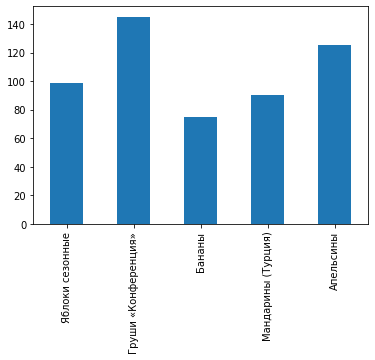

In [6]:
fruits_series.plot(kind="bar")

<AxesSubplot:>

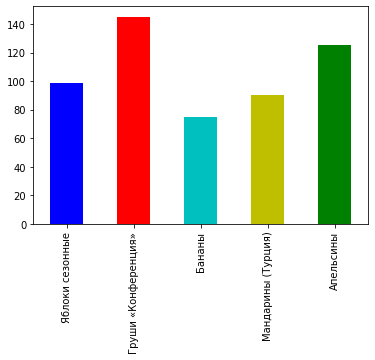

In [7]:
fruits_colors = ['b', 'r', 'c', 'y', 'g']
fruits_series.plot(kind="bar", color = fruits_colors)

In [8]:
vegetables = ["Картофель", "Лук репчатый", "Морковь", "Свёкла"]
prices2 = [26, 29, 30, 25]
vegetables_series = pd.Series(prices2, index = vegetables)
vegetables_series 

Картофель       26
Лук репчатый    29
Морковь         30
Свёкла          25
dtype: int64

В следующем пример все значения оказываются равными `NaN` (Not a Number — не число), так как 
для каждого из индексов (наименований фруктов и овощей) цена присутствует лишь в одном «ряду» и
при вычислении суммы приходится складывать число с отсутствующим значением.

In [9]:
fruits_series + vegetables_series

Апельсины             NaN
Бананы                NaN
Груши «Конференция»   NaN
Картофель             NaN
Лук репчатый          NaN
Мандарины (Турция)    NaN
Морковь               NaN
Свёкла                NaN
Яблоки сезонные       NaN
dtype: float64

Объединить два «ряда» в один можно, например, с помощью метода `append`:

In [10]:
fruits_series.append(vegetables_series)

Яблоки сезонные         99
Груши «Конференция»    145
Бананы                  75
Мандарины (Турция)      90
Апельсины              125
Картофель               26
Лук репчатый            29
Морковь                 30
Свёкла                  25
dtype: int64

Создадим ещё один аналогичный набор данных (цены другого магазина):

In [11]:
other_index = fruits + vegetables
other_index

['Яблоки сезонные',
 'Груши «Конференция»',
 'Бананы',
 'Мандарины (Турция)',
 'Апельсины',
 'Картофель',
 'Лук репчатый',
 'Морковь',
 'Свёкла']

In [12]:
other_prices = [95, 155, 85, 80, 120, 28, 27, 29, 27]
other_prices

[95, 155, 85, 80, 120, 28, 27, 29, 27]

In [13]:
other_series = pd.Series(other_prices, index = other_index)
other_series 

Яблоки сезонные         95
Груши «Конференция»    155
Бананы                  85
Мандарины (Турция)      80
Апельсины              120
Картофель               28
Лук репчатый            27
Морковь                 29
Свёкла                  27
dtype: int64

Так можно определить минимальную цену на каждый из рассматриваемых товаров:

In [14]:
np.minimum(fruits_series.append(vegetables_series), other_series)

Яблоки сезонные         95
Груши «Конференция»    145
Бананы                  75
Мандарины (Турция)      80
Апельсины              120
Картофель               26
Лук репчатый            27
Морковь                 29
Свёкла                  25
dtype: int64

### DataFrame

Очень часто таблицы загружают из csv-файлов. Например, так:


In [15]:
table = pd.read_csv("player_info.csv", sep=",")
table.head()

,player_id,firstName,lastName,nationality,birthCity,primaryPosition,birthDate,birthStateProvince,height,height_cm,weight,shootsCatches
0,8466148,Marian,Hossa,SVK,Stará Lubovna,RW,1979-01-12 00:00:00,NaN,"6' 1""",185.42,207.0,L
1,8465058,Michal,Rozsival,CZE,Vlasim,D,1978-09-03 01:00:00,NaN,"6' 1""",185.42,210.0,R
2,8476906,Shayne,Gostisbehere,USA,Pembroke Pines,D,1993-04-20 01:00:00,FL,"5' 11""",180.34,180.0,L
3,8466285,Brian,Campbell,CAN,Strathroy,D,1979-05-23 01:00:00,ON,"5' 10""",177.80,192.0,L
4,8470607,Brent,Seabrook,CAN,Richmond,D,1985-04-20 01:00:00,BC,"6' 3""",190.50,220.0,R


Метод `head` (как и такая же команда shell) по умолчанию выводит 5 первых рядов таблицы.

Можно выбрать одну колонку (по индексу-имени) и получить «ряд»:

In [16]:
table['lastName'].head(10)

0           Hossa
1        Rozsival
2    Gostisbehere
3        Campbell
4        Seabrook
5           Weise
6          Giroux
7        Crawford
8      Hinostroza
9          Kruger
Name: lastName, dtype: object

In [17]:
type(table)

pandas.core.frame.DataFrame

In [18]:
type(table['lastName'].head(10))

pandas.core.series.Series

Есть возможность выбирать только те ряды, в которых заданная колонка имеет определённое значение. Вот как можно выбрать последних 7 российских хоккеистов:

In [19]:
table[table.nationality == 'RUS'].tail(7)

,player_id,firstName,lastName,nationality,birthCity,primaryPosition,birthDate,birthStateProvince,height,height_cm,weight,shootsCatches
3861,8481501,Artyom,Zagidulin,RUS,Magnitogorsk,G,1995-08-08 01:00:00,NaN,"6' 2""",187.96,180.0,L
3864,8481178,Egor,Zamula,RUS,Chelyabinsk,D,2000-03-30 01:00:00,NaN,"6' 3""",190.50,177.0,L
3872,8480823,Alexander,Alexeyev,RUS,St. Petersburg,D,1999-11-15 00:00:00,NaN,"6' 4""",193.04,210.0,L
3882,8481031,Ivan,Prosvetov,RUS,Moscow,G,1999-03-05 00:00:00,NaN,"6' 5""",195.58,175.0,L
3886,8480943,Igor,Ozhiganov,RUS,Krasnogorsk,D,1992-10-13 01:00:00,NaN,"6' 2""",187.96,210.0,R
3894,8480955,Bogdan,Kiselevich,RUS,Cherepovets,D,1990-02-14 00:00:00,NaN,"6' 0""",182.88,202.0,L
3896,8480948,Egor,Yakovlev,RUS,Magnitogorsk,D,1991-09-17 01:00:00,NaN,"6' 0""",182.88,190.0,L


А так можно получить их количество:

In [20]:
len(table[table.nationality == 'RUS'])

210

Можно использовать сложные условия. Выбираем защитников из Москвы:

In [21]:
table[(table.birthCity == 'Moscow') & (table.primaryPosition == 'D')]

,player_id,firstName,lastName,nationality,birthCity,primaryPosition,birthDate,birthStateProvince,height,height_cm,weight,shootsCatches
303,8477507,Nikita,Zadorov,RUS,Moscow,D,1995-04-16 01:00:00,NaN,"6' 5""",195.58,230.0,L
313,8478842,Andrei,Mironov,RUS,Moscow,D,1994-07-29 01:00:00,NaN,"6' 3""",190.50,194.0,L
581,8479458,Nikita,Zaitsev,RUS,Moscow,D,1991-10-29 00:00:00,NaN,"6' 2""",187.96,195.0,R
604,8476289,Alexey,Marchenko,RUS,Moscow,D,1992-01-02 00:00:00,NaN,"6' 3""",190.50,210.0,R
1443,8468501,Anton,Volchenkov,RUS,Moscow,D,1982-02-25 00:00:00,NaN,"6' 1""",185.42,220.0,L
2105,8474107,Maxim,Goncharov,RUS,Moscow,D,1989-06-15 01:00:00,NaN,"6' 3""",190.50,215.0,R
2343,8458494,Sergei,Zubov,RUS,Moscow,D,1970-07-22 01:00:00,NaN,"6' 1""",185.42,198.0,R
2607,8462258,Danny,Markov,RUS,Moscow,D,1976-07-30 01:00:00,NaN,"6' 1""",185.42,186.0,L
2748,8468105,Alexander,Khavanov,RUS,Moscow,D,1972-01-30 00:00:00,NaN,"6' 2""",187.96,205.0,L
2781,8458963,Boris,Mironov,RUS,Moscow,D,1972-03-21 01:00:00,NaN,"6' 4""",193.04,223.0,R
